In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('Position_Salaries.csv')

# Extract the independent variable (Position level) as a 2D array
x = df.iloc[:, 1:2].values  # Using 1:2 to ensure x is a 2D array of shape (n_samples, 1)

# Extract the dependent variable (Salary)
y = df.iloc[:, 2].values

# Display the first few rows of the dataframe
print(df.head())


            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


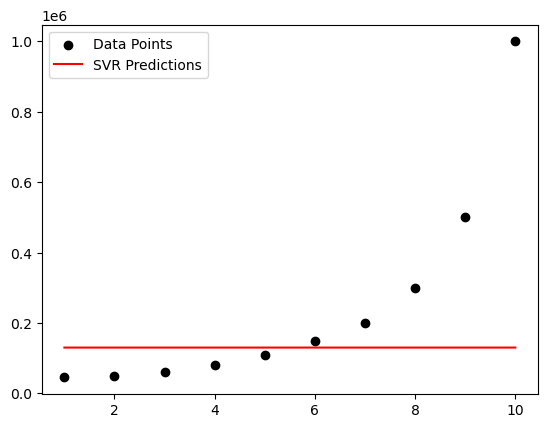

In [4]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Create and fit the SVR model with an RBF kernel
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

# Plot the original data points
plt.scatter(x, y, color='black', label='Data Points')

# Plot the SVR model predictions
plt.plot(x, regressor.predict(x), color='red', label='SVR Predictions')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


### The model's performance is suboptimal because we did not scale the input data. While many models, such as `LinearRegression`, automatically scale the data, the `SVR` model does not. As a result, we need to manually scale the data to ensure better performance.



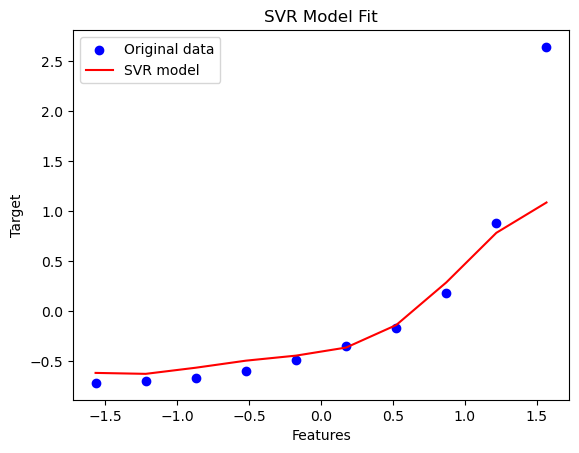

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Initialize the StandardScaler for both features and target
sc_x = StandardScaler()
sc_y = StandardScaler()

# Fit and transform the features
x = sc_x.fit_transform(x)

# Reshape the target to 2D and then fit and transform
y = sc_y.fit_transform(y.reshape(-1, 1))

# Train the SVR model with RBF kernel
regressor = SVR(kernel='rbf').fit(x, y.ravel())

# Plot the original data points
plt.scatter(x, y, color='blue', label='Original data')

# Plot the SVR model predictions
plt.plot(x, regressor.predict(x), color='red', label='SVR model')

# Add labels and legend
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('SVR Model Fit')
plt.legend()

# Display the plot
plt.show()


The prediction of the last point is slightly inaccurate because it is treated as an outlier by the default parameters set by `SVR`.

To predict a particular input, follow these steps:
1. **Scale the input** using the same scaler used for training.
2. **Predict the scaled input** using the trained model.
3. **Inverse scale the prediction** to obtain the actual value.


In [12]:
import numpy as np

# Predict the scaled input and then inverse transform to get the actual value
input_value = np.array([[6.5]])  # Ensure the input is 2D
scaled_input = sc_x.transform(input_value)
scaled_prediction = regressor.predict(scaled_input)
y_pred = sc_y.inverse_transform(scaled_prediction.reshape(-1, 1))

# Output the prediction
y_pred


array([[0.01158103]])